In [236]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [146]:
data = pd.read_csv('COVID-19 Cases.csv')
data.head(2)

/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime
0,Confirmed,NaN,6,0,5/22/2020,Western Sahara,Western Sahara,NaN,NaN,EH,ESH,NaN,24.2155,-12.8858,597330.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM
1,Confirmed,NaN,0,0,2/3/2020,Switzerland,Switzerland,NaN,NaN,CH,CHE,NaN,46.8182,8.2275,8654618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM


In [68]:
data.columns

Index(['Case_Type', 'People_Total_Tested_Count', 'Cases', 'Difference', 'Date',
       'Combined_Key', 'Country_Region', 'Province_State', 'Admin2', 'iso2',
       'iso3', 'FIPS', 'Lat', 'Long', 'Population_Count',
       'People_Hospitalized_Cumulative_Count', 'Data_Source',
       'Prep_Flow_Runtime'],
      dtype='object')

In [147]:
data.drop(columns=['People_Total_Tested_Count', 'Difference', 'Admin2', 'iso2', 'iso3', 'FIPS', 'People_Hospitalized_Cumulative_Count', 'Data_Source', 'Prep_Flow_Runtime'], inplace=True) # 'Combined_Key',

In [70]:
data.head()

,Case_Type,Cases,Date,Combined_Key,Country_Region,Province_State,Lat,Long,Population_Count
0,Confirmed,6,5/22/2020,Western Sahara,Western Sahara,NaN,24.215500,-12.885800,597330.0
1,Confirmed,0,2/3/2020,Switzerland,Switzerland,NaN,46.818200,8.227500,8654618.0
2,Deaths,0,3/1/2020,Cyprus,Cyprus,NaN,35.126400,33.429900,1207361.0
3,Confirmed,23,4/21/2020,Antigua and Barbuda,Antigua and Barbuda,NaN,17.060800,-61.796400,97928.0
4,Deaths,56,5/11/2020,Thailand,Thailand,NaN,15.870032,100.992541,69799978.0


In [149]:
countries = data[data['Province_State'].isnull() == True]

In [150]:
countries['Date'] = pd.to_datetime(countries['Date'])

/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [251]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49140 entries, 0 to 950652
Data columns (total 8 columns):
Case_Type           49140 non-null object
Cases               49140 non-null int64
Date                49140 non-null datetime64[ns]
Combined_Key        49140 non-null object
Country_Region      49140 non-null object
Lat                 49140 non-null float64
Long                49140 non-null float64
Population_Count    49140 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 3.4+ MB


In [152]:
countries.drop(columns=['Province_State'], inplace=True)
countries = countries.dropna()

In [153]:
countries.isnull().sum()

Case_Type           0
Cases               0
Date                0
Combined_Key        0
Country_Region      0
Lat                 0
Long                0
Population_Count    0
dtype: int64

In [154]:
# split
country_cases = countries[countries['Case_Type'] == 'Confirmed']
country_deaths = countries[countries['Case_Type'] == 'Deaths']

In [207]:
country_cases.sort_values(by=['Date'], inplace=True)
country_deaths.sort_values(by=['Date'], inplace=True)

/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [180]:
# Only consider highest populated countries 
top_pop = country_cases.sort_values(by=['Population_Count'], ascending=False)

top_pop_countries = []
for country in top_pop['Country_Region'].unique():
    top_pop_countries.append(country)
top_pop_countries[0:5]

['India', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria']

In [208]:
country_cases1 = country_cases[country_cases['Date'] >= '2020-04-01'] # cut off dates before Mar 1
country_deaths1 = country_deaths[country_deaths['Date'] >= '2020-04-01']

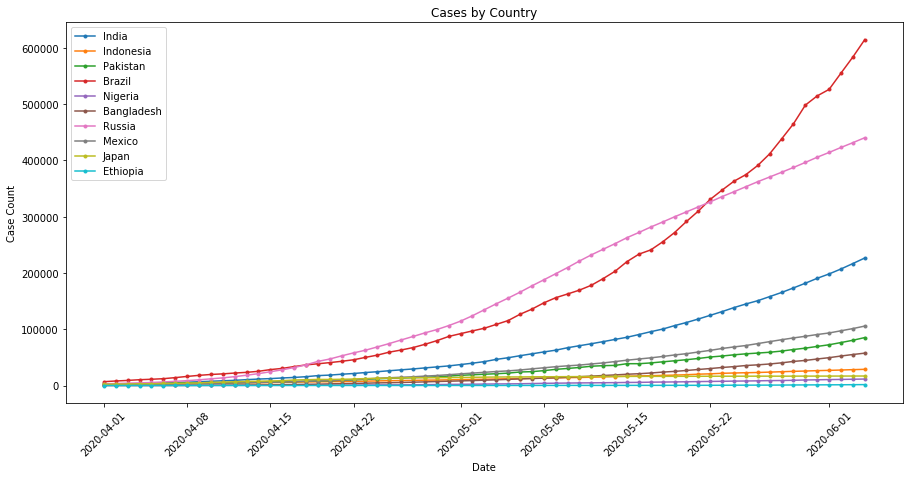

In [206]:
# PLOT CASES BY COUNTRY
ax, fig = plt.subplots(figsize=(15,7))
for country in top_pop_countries[0:10]: 
    plt.plot('Date', 'Cases', data=country_cases1[country_cases1['Country_Region'] == country], marker='.', linestyle=None, label=country)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Case Count')
plt.title('Cases by Country')
plt.legend(loc='upper left')

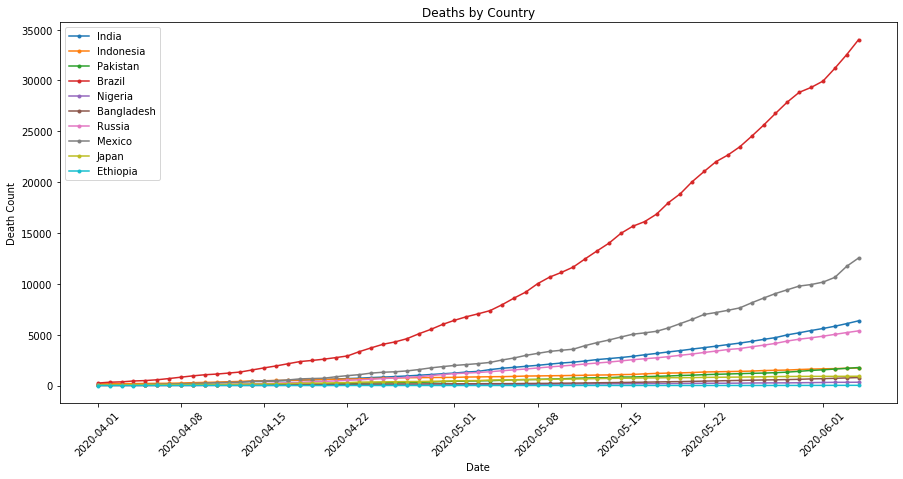

In [209]:
# PLOT CASES BY COUNTRY
ax, fig = plt.subplots(figsize=(15,7))
for country in top_pop_countries[0:10]: 
    plt.plot('Date', 'Cases', data=country_deaths1[country_deaths1['Country_Region'] == country], marker='.', linestyle=None, label=country)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Death Count')
plt.title('Deaths by Country')
plt.legend(loc='upper left')

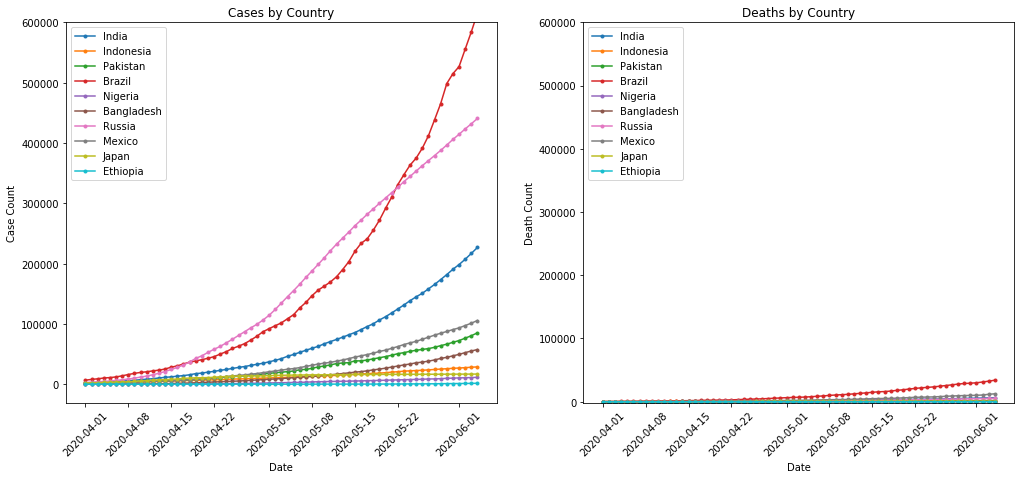

In [233]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17,7))

for country in top_pop_countries[0:10]: 
    ax[0].plot('Date', 'Cases', data=country_cases1[country_cases1['Country_Region'] == country], marker='.', linestyle=None, label=country)
ax[0].set_ylim(top=600000)
ax[0].set_xlabel('Date')
ax[0].tick_params(axis='x', labelrotation = 45)
ax[0].set_ylabel('Case Count')
ax[0].set_title('Cases by Country')
ax[0].legend(loc='upper left')


for country in top_pop_countries[0:10]: 
    ax[1].plot('Date', 'Cases', data=country_deaths1[country_deaths1['Country_Region'] == country], marker='.', linestyle=None, label=country)
ax[1].set_ylim(top=600000)
ax[1].set_xlabel('Date')
ax[1].tick_params(axis='x', labelrotation = 45)
ax[1].set_ylabel('Death Count')
ax[1].set_title('Deaths by Country')
ax[1].legend(loc='upper left')

In [235]:
print('Maximum Death Count: ', country_deaths1['Cases'].max()) # max deaths for country (in these data)

Maximum Death Count:  39904


In [246]:
# Correlation between cases and deaths
pearsonr(country_cases1['Cases'].sort_values(), country_deaths1['Cases'].sort_values())[0]

0.9526822649922612

In [249]:
# Correlation between deaths and population
pearsonr(country_deaths1['Population_Count'].sort_values(), country_deaths1['Cases'].sort_values())[0]

0.818814354266741

In [250]:
# Correlation between cases and population
pearsonr(country_cases1['Population_Count'].sort_values(), country_cases1['Cases'].sort_values())[0]

0.8271181873105696